# Plotter Class Usage Guide

The `Plotter` class provides utility methods for creating formatted figures with captions.

## Available Methods:
- `new(fig_size=None, constrained_layout=True, nrows=None, ncols=None)` - Create a new figure or subplots
- `subplots(nrows, ncols, fig_size=None, constrained_layout=True, **kwargs)` - Create figure with subplots
- `add_caption(title, fig_num=None, filename=None, use_panel_titles=True, auto_label_panels=True)` - Add formatted caption
- `add_panel_description(description)` - Manually add panel description
- `add_label(fig_label='A')` - Add label to current axes
- `label_subplots(labels=None, start='A')` - Manually label all subplots (auto-called by add_caption)
- `save_figure(filename='figure')` - Save to figures/ directory
- `plot_sequence(fiber, ...)` - Plot ChromatinFiber objects
- `panels` - Property to access subplot axes

## Basic Workflow for Multi-panel Figures:
1. Create Plotter instance: `plot = Plotter()`
2. Create subplots: `plot.new(nrows=2, ncols=2)`
3. Create plots and set titles: `panel.set_title("Description")`
4. Add caption: `plot.add_caption("Main title.")` - automatically does everything!
5. Display: `plt.show()`

## What `add_caption()` Does Automatically:
When called on a multi-panel figure, `add_caption()` will:
1. **Label all panels** (A, B, C, D...) if there's more than one subplot
2. **Extract titles** from all panels using `ax.get_title()`
3. **Remove titles** from the plots for a cleaner look
4. **Add to caption** with labels: "**A)** description **B)** description"

No need to manually call `label_subplots()` anymore!

In [1]:
import numpy as np
from Plotter import Plotter
import matplotlib.pyplot as plt

plot = Plotter((12, 2))

## Solution 3: Use updated Plotter.new() with constrained_layout (Recommended)

The Plotter class now supports `constrained_layout` by default, which keeps the plot area consistent.

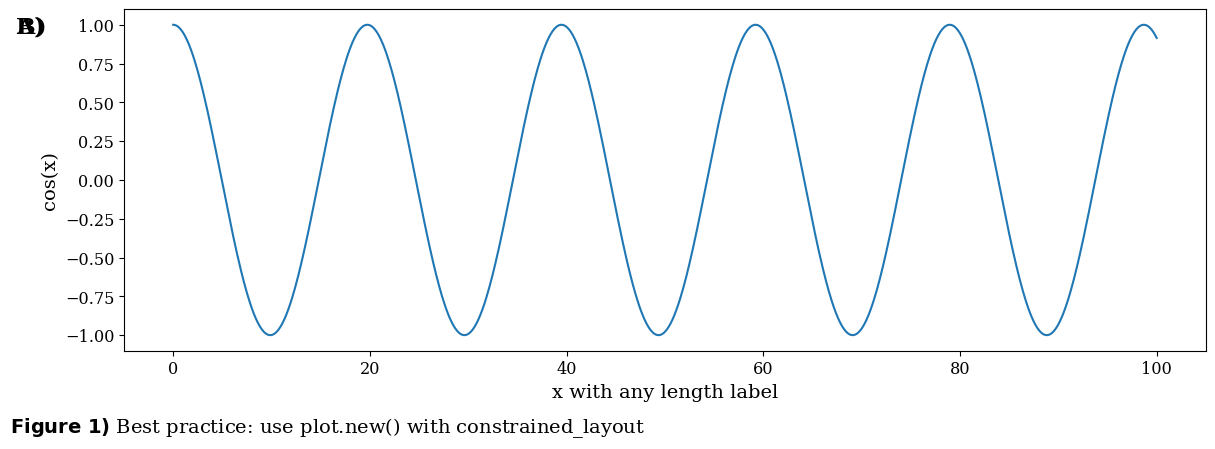

In [2]:
# Solution 3: Using Plotter with constrained_layout (enabled by default)
plot.new(fig_size=(12, 4))  # constrained_layout=True by default

x = np.linspace(0, 100, 1000)
y = np.cos(x/np.pi)

plt.plot(x, y)
plt.xlabel("x with any length label")
plt.ylabel("cos(x)")
plot.add_caption("Best practice: use plot.new() with constrained_layout")
plot.add_label()
plot.add_label("B")
plt.show()


## Creating Subplots - Two Equivalent Methods

You can create subplots using either:
1. **`plot.new(nrows=2, ncols=2)`** - Cleaner, integrated approach
2. **`fig, axes = plot.subplots(2, 2)`** - Explicit, returns values

Both methods populate `plot.panels` (or `plot.axes`) for accessing the subplot axes.

## Example 1: Multi-panel Figure with Auto-labeling

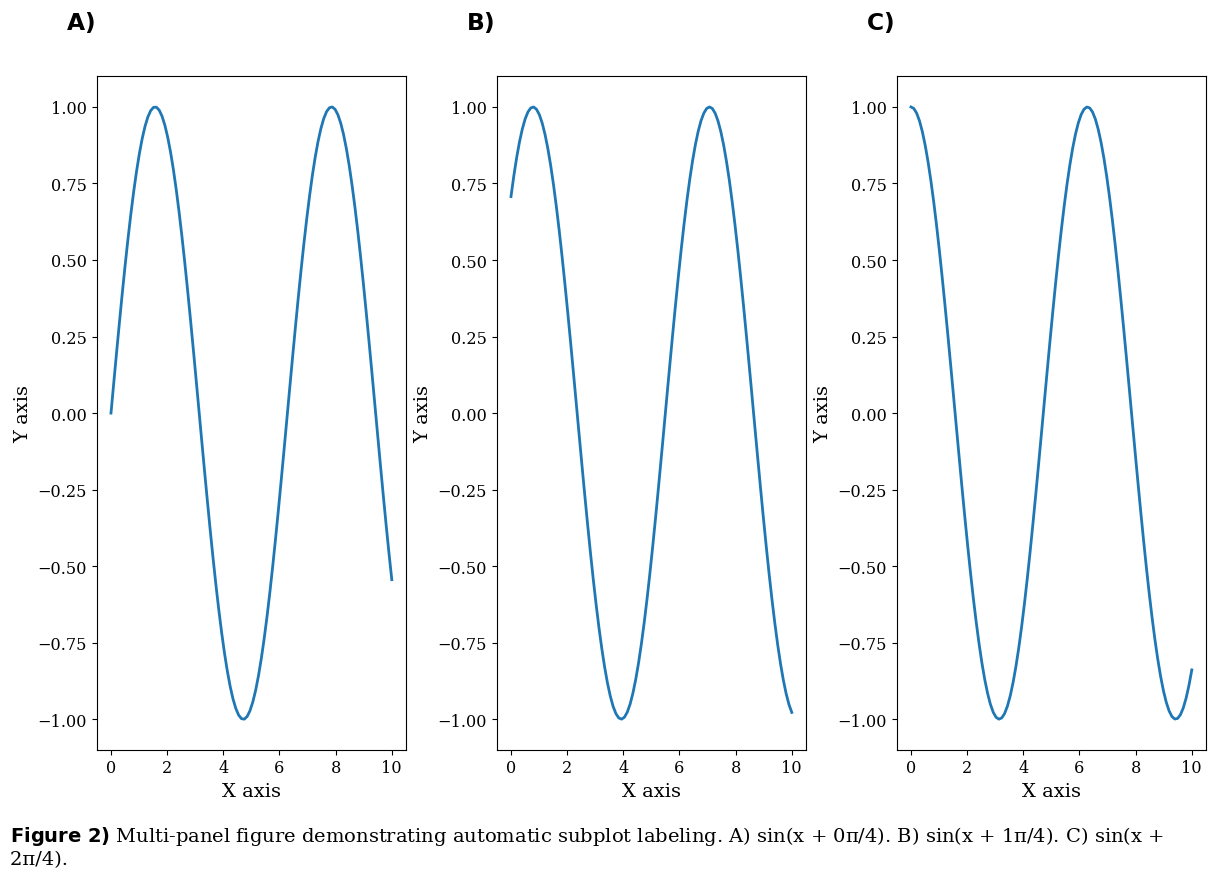

In [ ]:
# Create figure with subplots
plot.new(fig_size=(12, 8), nrows=1, ncols=3)

# Plot each panel and set its title (will be moved to caption)
for i, panel in enumerate(plot.panels):
    x = np.linspace(0, 10, 100)
    y = np.sin(x + i * np.pi/4)
    panel.plot(x, y, linewidth=2)
    panel.set_xlabel('X axis')
    panel.set_ylabel('Y axis')
    panel.set_title(f"sin(x + {i}π/4)")

# Add caption - automatically labels panels, extracts titles, and moves them to caption
plot.add_caption("Multi-panel figure demonstrating automatic subplot labeling.")

plt.show()